In [ ]:
import numpy as np
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house_price = pd.read_csv('housing.csv', header = None, delimiter = r"\s+", names = column_names)

In [ ]:
house_price.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
house_price.shape

(506, 14)

In [ ]:
house_price.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


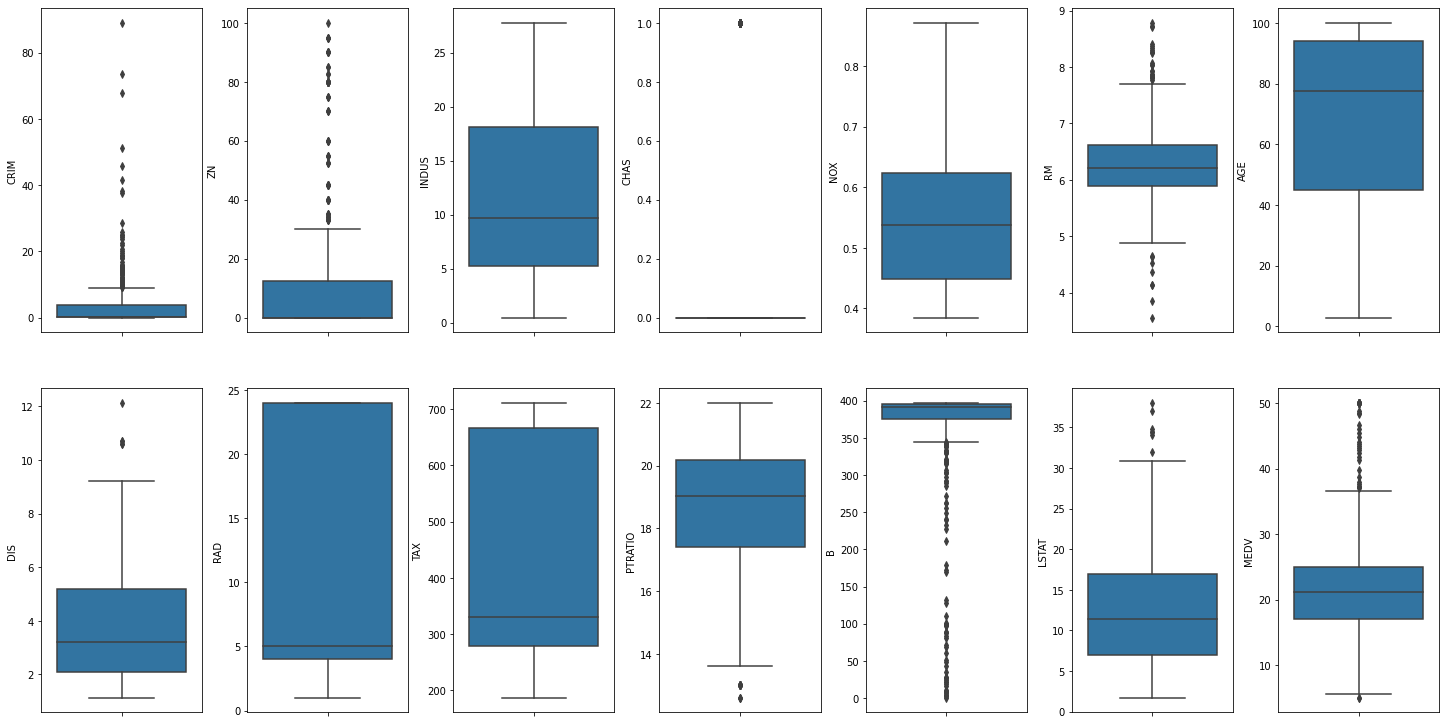

In [ ]:
# plot the dataset
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axis = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
axis = axis.flatten()
for k, v in house_price.items():
  sns.boxplot(y = k, data = house_price, ax = axis[index])
  index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [ ]:
# calculate the outliers percentage in each column of dataset
for k, v in house_price.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq_range = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq_range)|(v >= q3 + 1.5 * irq_range)]
  percent = round(np.shape(v_col)[0] * 100 / np.shape(house_price)[0], 2)
  print(f"Column {k} has {percent}% outliers.")

Column CRIM has 13.04% outliers.
Column ZN has 13.44% outliers.
Column INDUS has 0.0% outliers.
Column CHAS has 100.0% outliers.
Column NOX has 0.0% outliers.
Column RM has 5.93% outliers.
Column AGE has 0.0% outliers.
Column DIS has 0.99% outliers.
Column RAD has 0.0% outliers.
Column TAX has 0.0% outliers.
Column PTRATIO has 2.96% outliers.
Column B has 15.22% outliers.
Column LSTAT has 1.38% outliers.
Column MEDV has 7.91% outliers.


In [ ]:
# variable MEDV seems to be censored at 50.00 (corresponding to a median price of $50.000), so, values above 50.00 may not help to predict MEDV
# remove MEDV which is smaller than 50.00
house_price = house_price[house_price['MEDV'] < 50]
house_price.shape

(490, 14)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

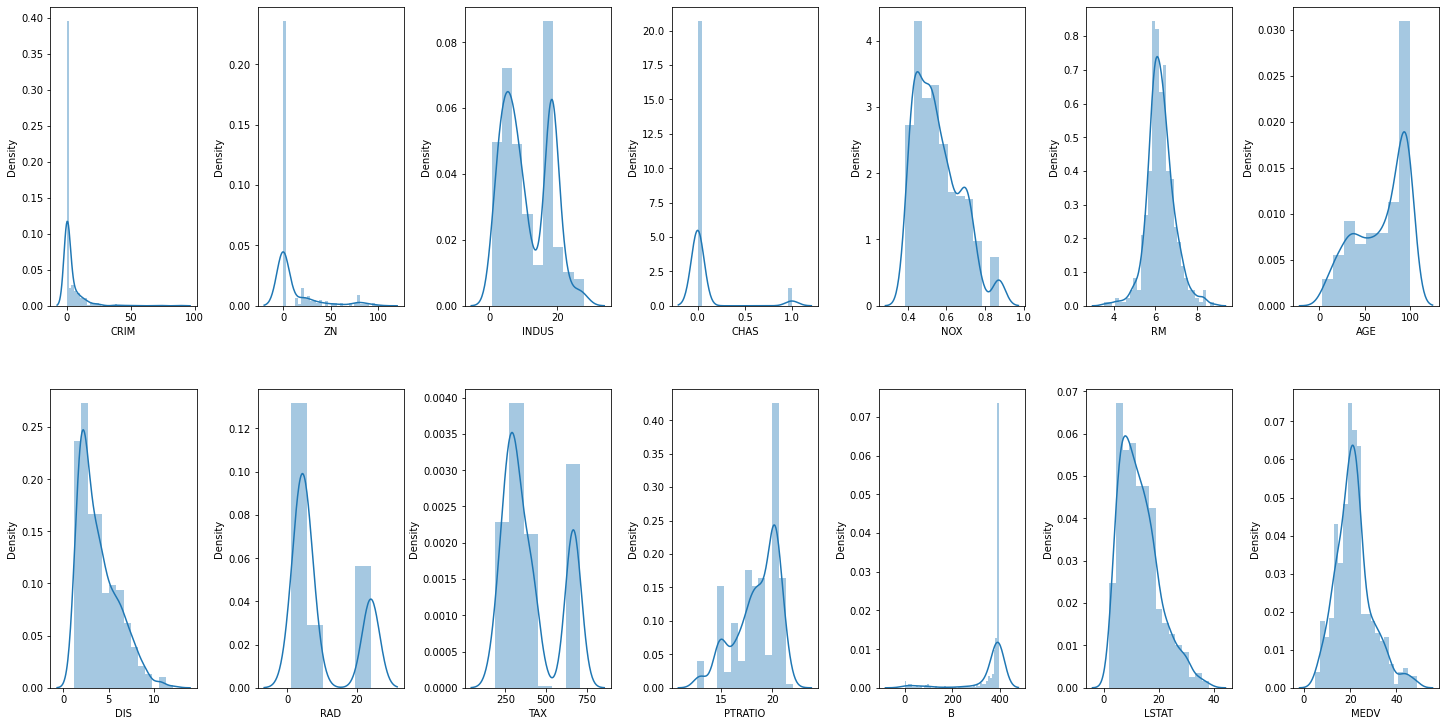

In [ ]:
# distribution of each variable
fig, axis = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
axis = axis.flatten()
for k, v in house_price.items():
  sns.distplot(v, ax = axis[index])
  index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

***the above histogram show that CRIM, ZN, B has highly skewed distribution***

***prediction: MEDV looks to have a normal distribution, other colums (except CHAS) seem to have normal or binomial ditribution of data (which is a discrete variable)***

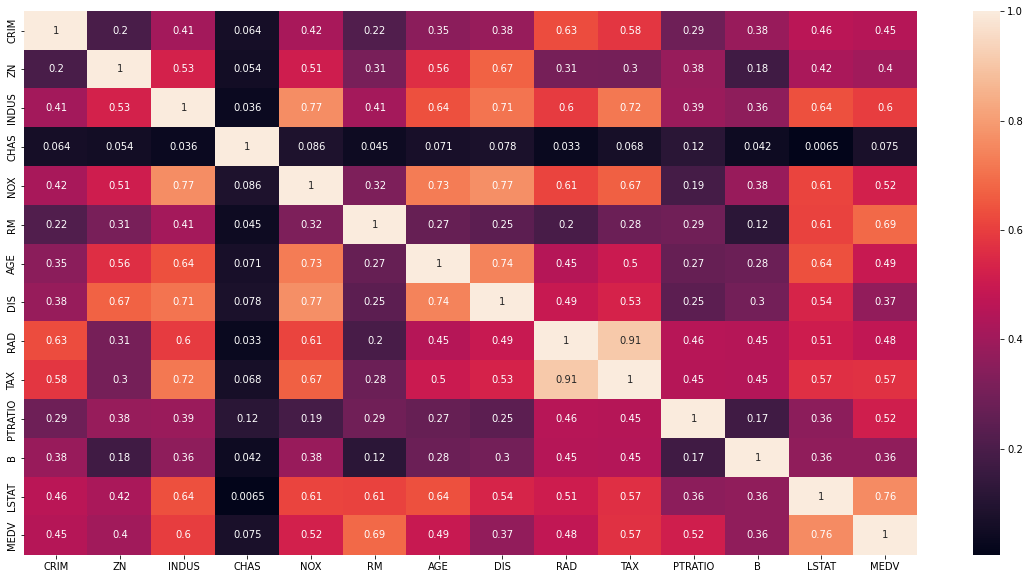

In [ ]:
# plot the correlation between variables in dataset
plt.figure(figsize=(20, 10))
sns.heatmap(house_price.corr().abs(),  annot = True) # write the data value in each cell

***we can see that the RAD and TAX has a highly correlated with corr(RAD, TAX)=0.91***

***the columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV, which is a good indication of using as predictors***

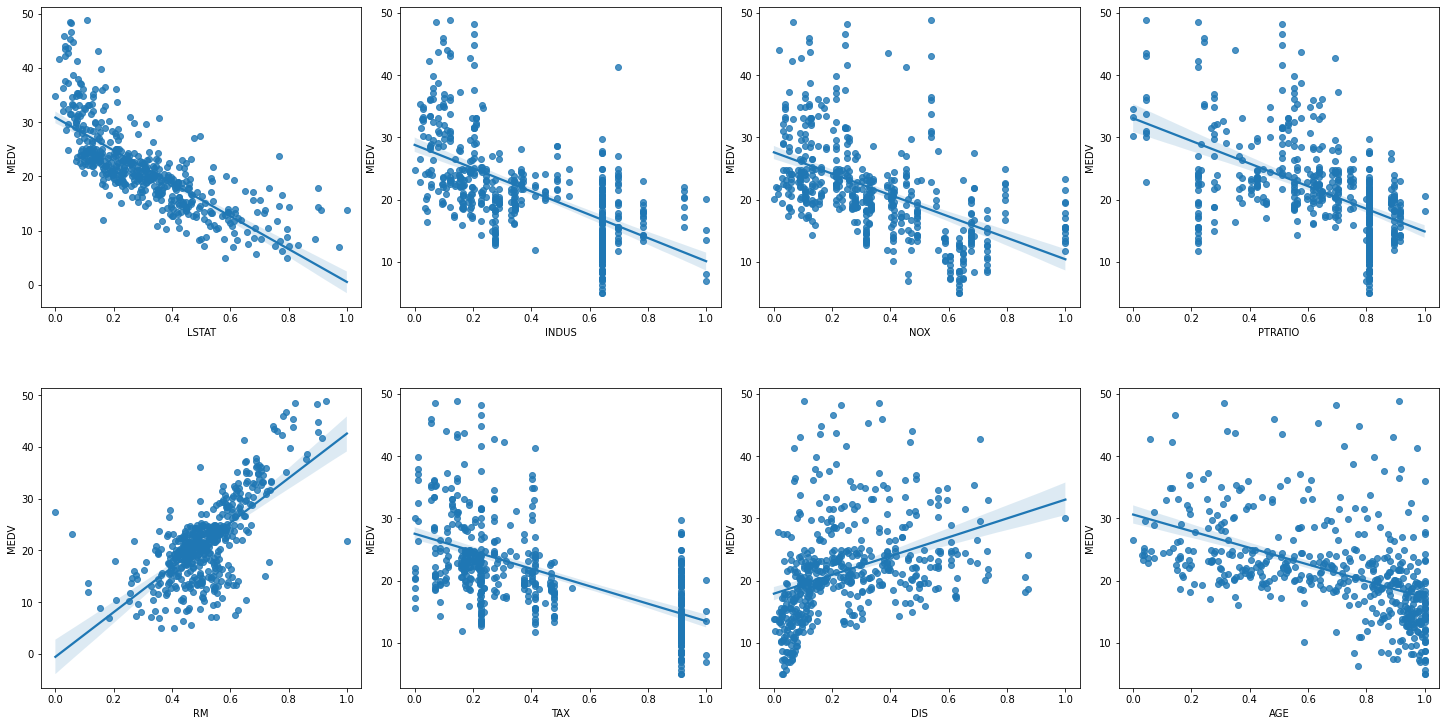

In [ ]:
# plot these columns against MEDV
from sklearn import preprocessing
# scale the columns 
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = house_price.loc[:,column_sels]
y = house_price['MEDV']
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = column_sels)
fig, axis = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 10))
index = 0
axis = axis.flatten()
for i, k in enumerate(column_sels):
  sns.regplot(y = y, x = x[k], ax = axis[i])
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [ ]:
# predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features
# remove the skewness of the data trough log transformation
y =  np.log1p(y)
for col in x.columns:
  if np.abs(x[col].skew()) > 0.3:
    x[col] = np.log1p(x[col])

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits = 10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv = kf, scoring = 'neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv = kf, scoring = 'neg_mean_squared_error')
scores_map['Ridge'] = scores
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

# polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model = make_pipeline(PolynomialFeatures(degree = 3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv = kf, scoring = 'neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

MSE: -0.0403430519730556 (+/- 0.039485641689323274)
MSE: -0.039011191061628155 (+/- 0.0368083052655976)
MSE: -0.0342188313578464 (+/- 0.027141395667224438)


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
scores = cross_val_score(svr_rbf, x_scaled, y, cv = kf, scoring = 'neg_mean_squared_error')
scores_map['SVR'] = scores
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

MSE: -0.04094470908631744 (+/- 0.03262281035044433)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
desc_tr = DecisionTreeRegressor(max_depth = 5)
scores = cross_val_score(desc_tr, x_scaled, y, cv = kf, scoring = 'neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

MSE: -0.04974584766702204 (+/- 0.03819518378352683)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 7)
scores = cross_val_score(knn, x_scaled, y, cv = kf, scoring = 'neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
print(f"KNN Accuracy: {scores.mean()} (+/- {scores.std()})")

KNN Accuracy: -0.04464414046353885 (+/- 0.024901791507366645)


In [ ]:
# compared to three models which are shosen through grid search, SVR performes better, try an ensemble method finally
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(alpha = 0.9, learning_rate = 0.05, max_depth = 2, min_samples_leaf = 5, min_samples_split = 2, 
                                n_estimators = 100, random_state = 30)
scores = cross_val_score(gbr, x_scaled, y, cv = kf, scoring = 'neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

MSE: -0.028869082944249086 (+/- 0.022276702428865133)


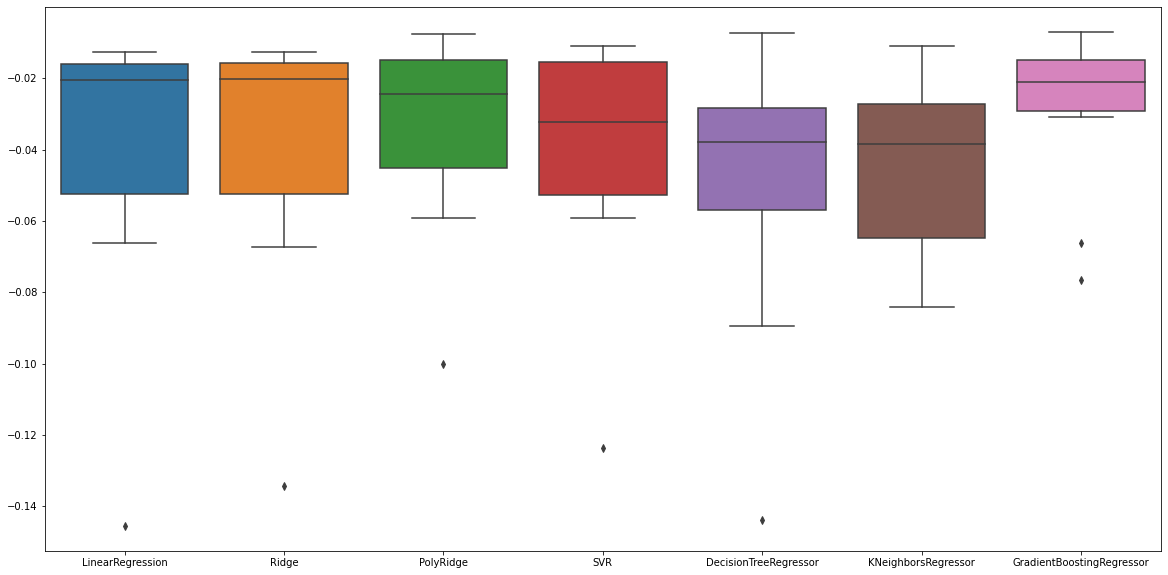

In [ ]:
# plot k-fold results to see which model has better distribution of results, with k-fold = 10
plt.figure(figsize = (20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data = scores_map)